<a href="https://colab.research.google.com/github/click-b8/Prob-Stats/blob/main/Noah_Brande's_Math_24_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# These lines are used to import necessary libraries for numerical computations and data visualizations in Python, using np and plt as convenient shortcuts to access their functions.


# Normal Random Number Generator

In [5]:
#CDF PDF

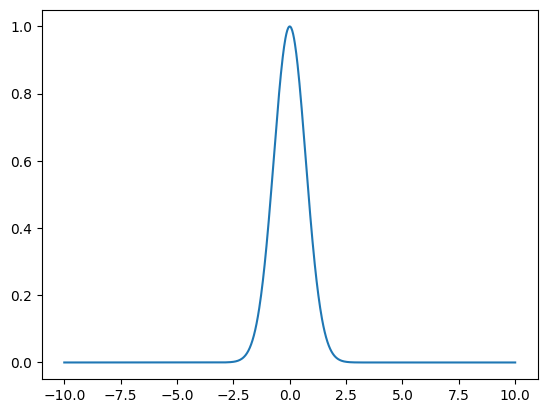

In [6]:
x = np.linspace(-10,10,1000) # Creates an array 'x' of 1000 points evenly spaced between -10 and 10.
y = 2.71**(-x**2)   # Calculates 'y' for each 'x' using the function 2.71 to the power of (-x squared).
plt.plot(x,y)  # Plots the function y = 2.71^(-x^2) using 'x' and 'y' values, showing a bell-shaped curve.

$e^{-x^2}$

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f)

In [7]:
def normal_pdf(x,mu,sigma):  # Calculates the value of the probability density function (pdf) for a normal (Gaussian) distribution
  # x: point at which to evaluate the pdf
  # mu: mean of the distribution
  # sigma: standard deviation of the distribution

  return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(x-mu)**2)/(2*sigma**2))

This code defines a function normal_pdf that calculates the probability density function (pdf) for a normal (Gaussian) distribution at a given point x, with specified mean mu and standard deviation sigma. The function uses the formula for the normal distribution pdf and returns the value of the pdf at x.

In [8]:
x = np.linspace(-6,6,1000)

In [9]:
mu = 0

In [10]:
sigma = 1

In [11]:
pdf = normal_pdf(x,mu,sigma)

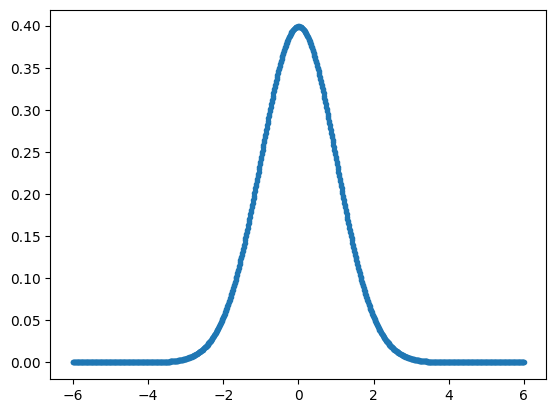

In [12]:
plt.plot(x,pdf,'.')
# plt.plot(x,y,'g.')

#Below we index the array which is important in Python

In [13]:
n=5 # Sets 'n' to 5.
x[2:5] # Slices the array 'x' from index 2 to 4 (5 is exclusive).
np.sum(x[0:n]) # Calculates the sum of the first 'n' elements in the array 'x'.

-29.879879879879876

In [14]:
def cumulative_sum(x):  # Function to compute the normalized cumulative sum of an array 'x'.

  y = np.zeros(x.shape)   # Initializes an array 'y' of the same shape as 'x', filled with zeros.


  for n in range(x.shape[0]): # Iterates over the length of 'x'.

    y[n] = np.sum(x[0:n])   # Computes the cumulative sum of elements in 'x' up to the nth element and stores it in 'y'.


  y = y / np.max(y)     # Normalizes 'y' by dividing each element by the maximum value in 'y'.

  return y

This function cumulative_sum takes an array x and calculates its cumulative sum, storing the result in a new array y. The cumulative sum at each point is normalized by dividing the entire y array by its maximum value. This results in a normalized cumulative sum, where the final element of y will be 1 (if x contains positive numbers).

In [18]:
z = np.array([1, 2, 3, 4, 5]) # Creates a NumPy array 'z' containing the elements [1, 2, 3, 4, 5].

In [19]:
z

array([1, 2, 3, 4, 5])

In [20]:
cdf = cumulative_sum(pdf)

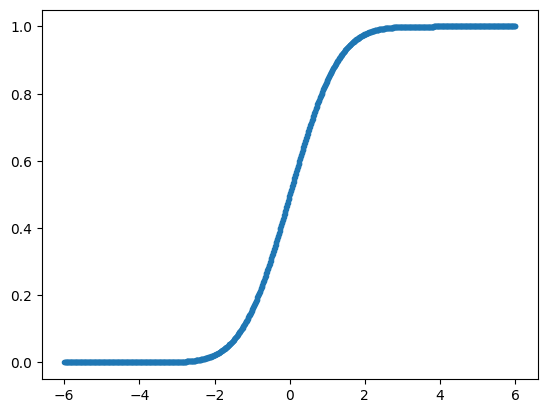

In [21]:
plt.plot(x,cdf,'.');

In [22]:
# d_cdf = cdf[1:] - cdf[0:-1] #Demo to show that the derivative of the cdf gives you back the pdf
# plt.plot(x[1:],d_cdf,'.');  #Not required for sampling

Now we flip the function to plug in numbers between 0 and 1

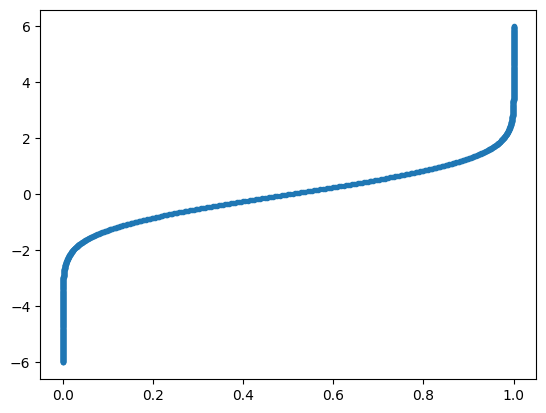

In [23]:
plt.plot(cdf,x,'.');

In [24]:
def find_nearest(array, value):

  idx = np.argmin(np.abs(array - value))

  return idx

In [30]:
z = np.array([11.2, 32, 63, 4, 3, 5, 67])

In [33]:
find_nearest(z,22.1) #function is to find the element in the array z that is closest to 22.1

1

In [34]:
z[1]

32.0

In [36]:
find_nearest(cdf,0.1) #The purpose of the find_nearest function in this context is to find the element in the cdf array that is closest to the value 0.1.

393

#Homemade random number generator

In [47]:
xr = np.random.random((10000,))

In [48]:
r = np.random.random

In [49]:
r

<function RandomState.random>

In [50]:
w = np.zeros(xr.shape[0]) # Initializes an array 'w' with the same length as 'xr', filled with zeros.

for i in range(xr.shape[0]): # Iterates over the length of 'xr'.

  w[i] = x[find_nearest(cdf, xr[i])] # For each index 'i', finds the index in 'cdf' closest to 'xr[i]' using 'find_nearest' function,
  # then uses this index to get a corresponding value from 'x' and assigns it to 'w[i]'.

In [51]:
w.shape

(10000,)

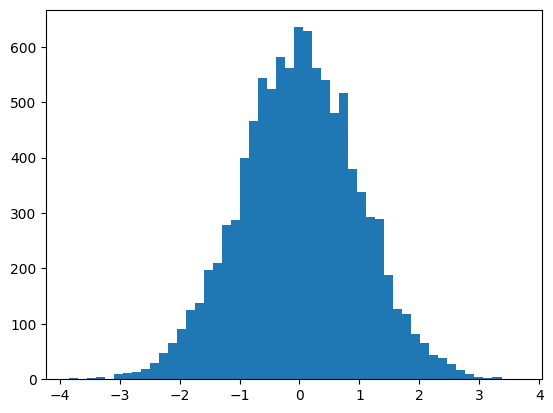

In [52]:
plt.hist(w,50);

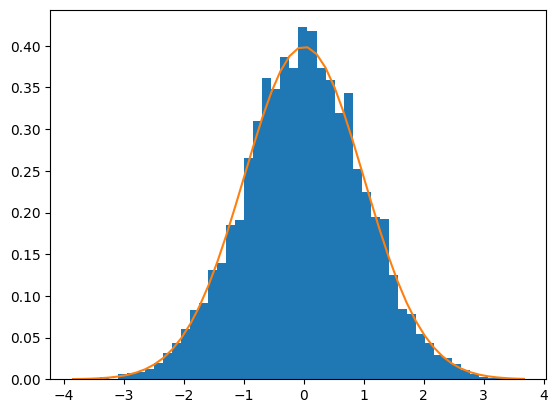

In [53]:
num_bins = 50
n,bins,patches = plt.hist(w, num_bins, density=1) # Plots a histogram of array 'w' with 50 bins, normalized to form a probability density (density=1).

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) # This line of code calculates the values of a normal distribution's probability density function (pdf) for each value in the bins array.
plt.plot(bins,y)

Pretty good match of our distribution

# Homework

Two people have the same birthday in this room, lets figure out who.


# Birthday Paradox

In [4]:
import random

def simulate_birthday_paradox(people, simulations, include_leap_year=False):
    # Sets a seed for reproducibility of the simulation
    random.seed(0)

    # Adjusts the range for birthdays based on whether leap years are included
    days_in_year = 366 if include_leap_year else 365

    matches = 0  # Counter for the number of simulations where at least two people share a birthday

    for _ in range(simulations):
        # Generates a list of random 'birthdays' for each person
        birthdays = [random.randint(1, days_in_year) for _ in range(people)]
        # Checks if there's a match (duplicate birthday) in the list
        if len(birthdays) != len(set(birthdays)):
            matches += 1

    probability = matches / simulations  # Calculates the probability of matching birthdays
    return probability

# Number of people in the room
people = 25

# Number of simulations
simulations = 10000

# Calculate the probability
probability = simulate_birthday_paradox(people, simulations)
probability


0.5669

As you can see in this revised version, you can now specify whether to include leap years in your simulations. The random seed is set for reproducibility. This code will work well for a wide range of simulations, but if you're planning to run an extremely large number, consider using a more efficient approach, perhaps with NumPy arrays or parallel processing techniques.

# Monty Hall

Whats behind the door problem.
Pick a door.

In [57]:
def simulate_monty_hall_final(simulations):
    wins_switching = 0
    wins_staying = 0

    for _ in range(simulations):
        # Randomly assign the car to a door (1, 2, or 3)
        car_door = random.randint(1, 3)
        # Player makes an initial choice
        player_choice = random.randint(1, 3)

        # Host opens a door, which is neither the player's choice nor the car door
        for host_choice in [1, 2, 3]:
            if host_choice != car_door and host_choice != player_choice:
                break

        # Find the remaining door for the player to switch to
        for switch_choice in [1, 2, 3]:
            if switch_choice != player_choice and switch_choice != host_choice:
                break

        # Count the number of wins for staying with the initial choice
        if player_choice == car_door:
            wins_staying += 1

        # Count the number of wins for switching to the other door
        if switch_choice == car_door:
            wins_switching += 1

    # Calculate the probabilities of winning by staying and switching
    probability_staying = wins_staying / simulations
    probability_switching = wins_switching / simulations

    return probability_staying, probability_switching

# Running the final version of the simulation
final_probability_staying, final_probability_switching = simulate_monty_hall_final(simulations)
final_probability_staying, final_probability_switching


(0.3381, 0.6619)

# Simple Craps

In [10]:
def simulate_dice_game(simulations):
    wins = 0

    for _ in range(simulations):
        # Roll two six-sided dice
        roll = random.randint(1, 6) + random.randint(1, 6)

        # Check for immediate win or loss
        if roll in [7, 11]:
            wins += 1
            continue
        elif roll in [2, 3, 12]:
            continue

        # Save the initial roll
        initial_roll = roll

        # Re-roll phase
        while True:
            roll = random.randint(1, 6) + random.randint(1, 6)
            if roll == 7:  # Loss condition
                break
            elif roll == initial_roll:  # Win condition
                wins += 1
                break

    probability_of_winning = wins / simulations
    return probability_of_winning

# Number of simulations
simulations = 100

# Calculate the probability
probability_of_winning = simulate_dice_game(simulations)
probability_of_winning


0.43

This simulation can give an insight into the probability of winning in this dice game under the defined rules. The actual probability will depend on the randomness in each simulation. The more simulations are run, the closer the result will likely be to the true probability.

# Collector's Card Paradox


In [5]:
def simulate_card_collectors_problem(n, simulations):
    total_card_packs_bought = 0

    for _ in range(simulations):
        collected_characters = set()
        card_packs_bought = 0

        # Buy card packs until all characters are collected
        while len(collected_characters) < n:
            new_card = random.randint(1, n)
            collected_characters.add(new_card)
            card_packs_bought += 1

        total_card_packs_bought += card_packs_bought

    # Calculate the average number of card packs needed
    average_card_packs_needed = total_card_packs_bought / simulations
    return average_card_packs_needed

# Number of different characters
n = 10

# Calculate the expected number of card packs
expected_card_packs = simulate_card_collectors_problem(n, simulations)
expected_card_packs


29.4816

In [ ]:
import random

def simulate_sock_drawer_problem(n, simulations):
    total_draws = 0

    for _ in range(simulations):
        socks = {}
        draws = 0

        while True:
            # Randomly draw a sock
            sock_color = random.randint(1, n)
            draws += 1

            # Update the count for this color
            if sock_color in socks:
                socks[sock_color] += 1
            else:
                socks[sock_color] = 1

            # Check for a pair
            if socks[sock_color] == 2:
                break

        total_draws += draws

    # Calculate the average number of draws needed
    average_draws_needed = total_draws / simulations
    return average_draws_needed

# Number of pairs of socks
n = 10

# Number of simulations
simulations = 10000

# Calculate the expected number of draws
expected_draws = simulate_sock_drawer_problem(n, simulations)
expected_draws


4.6864